In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [69]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython.display import display, HTML
show_html = lambda html: display(HTML(html))

In [70]:
import apafib
rawData = apafib.load_translation()

In [71]:
print(rawData[0][0][:100])
print(rawData[1][0])

b"In they parted; the two youngest repaired to the lodgings of one of the officers' wives, and conti
Original


In [72]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words = 'english')
X = vectorizer.fit_transform(rawData[0])
vectorizer.get_feature_names_out()
X = X.toarray()

array(['10', '13', '14', ..., 'zone', 'zoo', 'zoological'], dtype=object)

In [73]:
data = pd.DataFrame(data=X)
data['label'] = rawData[1]

In [74]:
def split(train, test):
  X_train = train.drop('label', axis=1)
  y_train = train['label'].copy()
  X_test = test.drop('label', axis=1)
  y_test = test['label'].copy()
  return X_train, y_train, X_test, y_test

In [75]:
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(data, test_size=0.2, random_state=0)
X_train, y_train, X_test, y_test = split(data_train, data_test)

<AxesSubplot: xlabel='TSNE1', ylabel='TSNE2'>

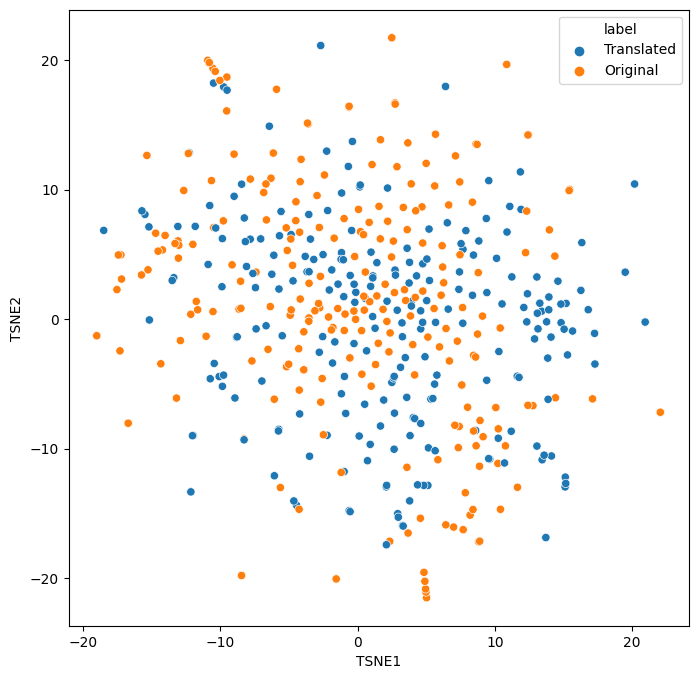

In [76]:
from sklearn.manifold import TSNE
data_tsne = TSNE(n_components=2, init='random', learning_rate='auto', perplexity=10, n_iter=2000, random_state=0, n_jobs=-1).fit_transform(X_train)
data_train[['TSNE1', 'TSNE2']] = data_tsne

fig = plt.figure(figsize=(8,8))
sns.scatterplot(x='TSNE1', y='TSNE2', data=data_train, hue='label')

In [77]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

In [78]:
clf = MultinomialNB()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

MultinomialNB()

0.9

In [79]:
clf = BernoulliNB()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

BernoulliNB()

0.8416666666666667

In [80]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

In [81]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
knn =  KNeighborsClassifier()
print(np.mean(cross_val_score(knn,X_train_s,y_train,cv=10)))


0.50625


In [82]:
from sklearn.model_selection import GridSearchCV
param = {'n_neighbors':[5, 7, 11, 15], 
          'weights':['distance', 'uniform'], 
          'metric': ['l2', 'l1', 'cosine']}

knn_gs =  GridSearchCV(knn,param,cv=5, n_jobs=-1)
knn_gs.fit(X_train_s, y_train);

In [83]:
show_html(pd.DataFrame(knn_gs.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score').head().to_html())

,params,mean_test_score,rank_test_score
20,"{'metric': 'cosine', 'n_neighbors': 11, 'weights': 'distance'}",0.925000,1
22,"{'metric': 'cosine', 'n_neighbors': 15, 'weights': 'distance'}",0.925000,1
21,"{'metric': 'cosine', 'n_neighbors': 11, 'weights': 'uniform'}",0.922917,3
23,"{'metric': 'cosine', 'n_neighbors': 15, 'weights': 'uniform'}",0.920833,4
19,"{'metric': 'cosine', 'n_neighbors': 7, 'weights': 'uniform'}",0.902083,5
